In [1]:
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os
from tqdm import tqdm

In [2]:
def clip_predict(images, labels):
    inputs = processor(text=labels, images=images, return_tensors="pt", padding=True)
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
    return probs.detach().numpy()

In [3]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [4]:
caption_results = pd.read_excel('caption_results.xlsx')
captions = (caption_results[['GIT caption','BLIP caption','VIT caption']]).values
captions = captions.reshape(-1).tolist()
captions = [c.replace('arafed ', '') for c in captions]
captions = [c.replace('araf ', '') for c in captions]

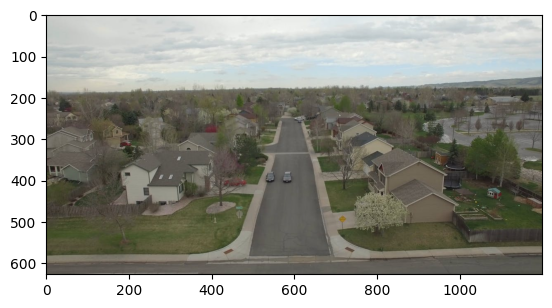

In [5]:
url =  "http://images.cocodataset.org/val2017/000000039769.jpg"
url = 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimages.pexels.com%2Fvideos%2F854222%2Ffree-video-854222.jpg%3Fauto%3Dcompress%26cs%3Dtinysrgb%26fit%3Dcrop%26h%3D627%26w%3D1200&f=1&nofb=1&ipt=854ab08c5b2d96e862c1babfd3aef50f054fe4debb1f1ac9f127e9b504866397&ipo=images'
image = Image.open(requests.get(url, stream=True).raw)
plt.imshow(image)

In [6]:
probs = clip_predict(image, ['this is a cat', 'this is a dog'])
print(probs)

[[0.4862472 0.5137528]]


In [7]:
%%time
rootdir = './ILT_aerosensing_proeffoto\'s/'
imgs, dims, names, paths = [], [], [], []
blip_preds, vit_preds, git_preds = [], [], []
for subdir, dirs, files in os.walk(rootdir):
    for file in tqdm(files):
        filepath = subdir + file

        if filepath.lower().endswith(".jpg"):
            img_path = filepath
            names.append(file)
            paths.append(filepath)
            raw_img = Image.open(img_path).convert('RGB')
            dims.append(np.array(raw_img).shape)
            imgs.append(raw_img)

100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:02<00:00, 12.34it/s]

CPU times: total: 2.72 s
Wall time: 2.2 s


In [8]:
%%time
clip_probs = clip_predict(imgs, captions)

CPU times: total: 15.2 s
Wall time: 5.7 s


In [9]:
results = []
for i, p in enumerate(clip_probs):
    max_ind = np.argmax(p)
    
    results.append([files[i], captions[max_ind], p[max_ind]])
clip_results = pd.DataFrame(results, columns = ['Image name', 'Predicted caption', 'Certainty'])
pd.set_option('display.max_colwidth', None)
display(clip_results)
#     plt.imshow(imgs[i])
#     plt.show()

,Image name,Predicted caption,Certainty
0,DJI_0003.jpg,a large pile of garbage is piled up next to a fence.,0.245504
1,DJI_0004.jpg,a large pile of scrap metal in a large container.,0.189033
2,DJI_0005.JPG,aerial view of a warehouse with a lot of trucks parked,0.940299
3,DJI_0008.jpg,a large blue container filled with trash sitting next to a pile of trash.,0.383313
4,DJI_0010.jpg,there are many trucks that are parked on the side of the road,0.158526
5,DJI_0012.JPG,the building is being used as a warehouse.,0.682548
6,DJI_0014.jpg,a large pile of scrap metal in a large container.,0.399698
7,DJI_0017.jpg,a white truck driving down a road next to a green field.,0.446288
8,DJI_0019.JPG,barge moving along a river with a large body of water,0.389020
9,DJI_0025.jpg,a large pile of garbage is piled up next to a fence.,0.816002


In [12]:
clip_results.to_excel('clip_results.xlsx')

In [10]:
root = r'D:\Downloads\annotations_trainval2014\annotations'
json_file = 'captions_val2014.json'
with open(os.path.join(root,json_file)) as json_data:
    data = json.load(json_data)
captions = [img['caption'] for img in data['annotations']]
captions = np.random.choice(captions, round(len(captions)/600), replace = False).tolist()
len(captions)

338

In [11]:
%%time
texts = captions + ['aerial photo of street', 'picture of a street', 'street view']
#["a photo of a cat", "a photo of a dog", 'a photo of two cats', 'a photo of three cats',
#'a photo of two cats on a pink blanket', 'a photo of two cats on a purple blanket', 'a photo of two cats on a pink floor']
probs = clip_predict(image, texts)[0]
max_ind = np.argmax(probs)
print(texts[max_ind], probs[max_ind])

# for i, p in enumerate(probs):
#     print('{:<70} (prob: {:.3f}){}'.format(texts[i], p, '*' if i == np.argmax(probs) else ''))

aerial photo of street 0.41689774
CPU times: total: 41.8 s
Wall time: 11.2 s
